In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Download NLTK stopwords
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

In [2]:
# Read Train and Test Data
train_data = pd.read_csv('train_data.txt', sep=":::", names=['Id', 'Title', 'Genre', 'Description'], engine='python', index_col=0)
test_data = pd.read_csv('test_data_solution.txt', sep=":::", names=['Id', 'Title', 'Genre', 'Description'], engine='python', index_col=0)


In [3]:
# Display data information
print("Train Data Info")
train_data.info()
print("\nTrain Data Description")
train_data.describe()

print("\nTest Data Info")
test_data.info()
print("\nTest Data Description")
test_data.describe()

Train Data Info
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2000 non-null   object
 1   Genre        2000 non-null   object
 2   Description  2000 non-null   object
dtypes: object(3)
memory usage: 62.5+ KB

Train Data Description

Test Data Info
<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB

Test Data Description


,Title,Genre,Description
count,54200,54200,54200
unique,54200,27,54072
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...
freq,1,13612,10


### Exploratory Data Analysis

Text(0.5, 1.0, 'Genre Distribution in Train Data')

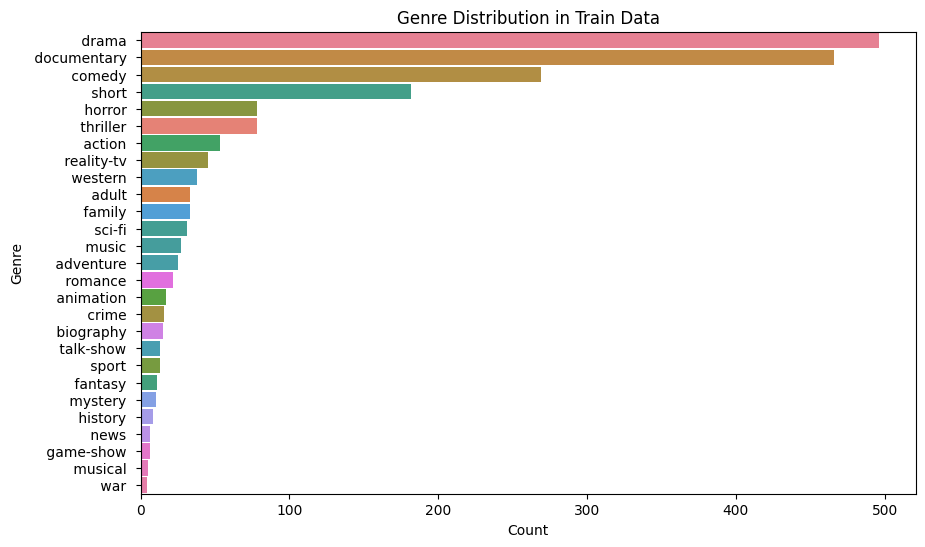

In [4]:
plt.figure(figsize=(10, 6))

sns.countplot(data=train_data, y="Genre", order=train_data['Genre'].value_counts().index, width=0.9, hue=train_data['Genre'])

plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Genre Distribution in Train Data')

### Data Preprocessing

In [5]:
# Data Preprocessing Function
def process_text(text):
    text = text.lower()
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [6]:
# Apply preprocessing to Description column
train_data['Description'] = train_data['Description'].apply(process_text)
test_data['Description'] = test_data['Description'].apply(process_text)


In [7]:
# Split data into X and Y
X_train = train_data['Description']
Y_train = train_data['Genre']
X_test = test_data['Description']
Y_test = test_data['Genre']

In [8]:
# Vectorize using TF-IDF
tfidf = TfidfVectorizer()
X_train_TFIDF = tfidf.fit_transform(X_train)
X_test_TFIDF = tfidf.transform(X_test)

### Model Training and Evaluation

In [9]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_TFIDF, Y_train)
Y_pred_nb = nb_model.predict(X_test_TFIDF)


# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_TFIDF, Y_train)
Y_pred_lr = lr_model.predict(X_test_TFIDF)

# SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train_TFIDF, Y_train)
Y_pred_svm = svm_model.predict(X_test_TFIDF)

In [10]:
# Evaluate all models
print(f'\nNaive Bayes Accuracy: {accuracy_score(Y_test, Y_pred_nb):.2f}')
print('Naive Bayes Classification Report:\n', classification_report(Y_test, Y_pred_nb))

print(f'\nLogistic Regression Accuracy: {accuracy_score(Y_test, Y_pred_lr):.2f}')
print('Logistic Regression Classification Report:\n', classification_report(Y_test, Y_pred_lr))

print(f'\nSVM Accuracy: {accuracy_score(Y_test, Y_pred_svm):.2f}')
print('SVM Classification Report:\n', classification_report(Y_test, Y_pred_svm))


Naive Bayes Accuracy: 0.43


c:\Users\SS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Naive Bayes Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.75      0.01      0.01      7446
       crime        0.00      0.00      0.00       505
 documentary        0.56      0.81      0.66     13096
       drama        0.35      0.91      0.51     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery        0.00    

c:\Users\SS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Logistic Regression Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.58      0.17      0.26      7446
       crime        0.00      0.00      0.00       505
 documentary        0.51      0.87      0.64     13096
       drama        0.39      0.85      0.53     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery        

c:\Users\SS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Classification Report:
                precision    recall  f1-score   support

      action        0.50      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.48      0.31      0.38      7446
       crime        0.00      0.00      0.00       505
 documentary        0.55      0.85      0.67     13096
       drama        0.40      0.83      0.54     13612
      family        1.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.74      0.03      0.06      2204
       music        1.00      0.01      0.03       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00  

c:\Users\SS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
